<a href="https://colab.research.google.com/github/va4756/big_RaeJung/blob/main/bigdata_RaeJung_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 107_의사결정나무

In [2]:
!git clone https://github.com/leeraejung/RaejungLecture-MachineLearning.git

Cloning into 'RaejungLecture-MachineLearning'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 711 (delta 0), reused 5 (delta 0), pack-reused 703 (from 1)
Receiving objects: 100% (711/711), 50.53 MiB | 7.97 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (692/692), done.


In [3]:
!pip install numpy matplotlib scikit-learn pandas
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


In [4]:
import logging
import matplotlib.pyplot as plt

# 로그 레벨 설정
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1.Decision Tree

### (Gini Index), (Entroy Index), (Information Gain)

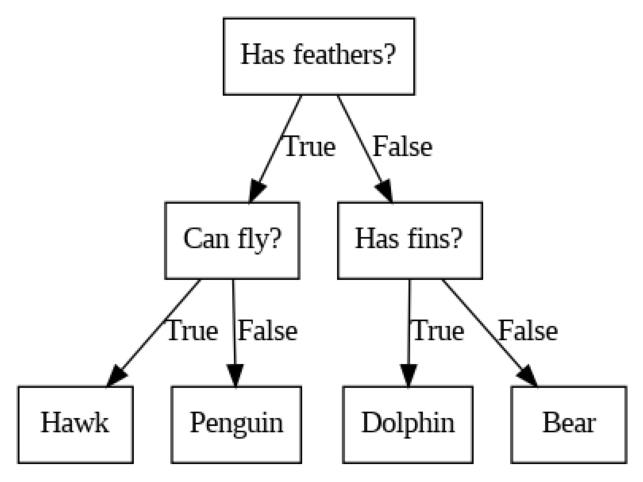

In [6]:
mglearn.plots.plot_animal_tree()

### 1.1 결정 트리 만들기

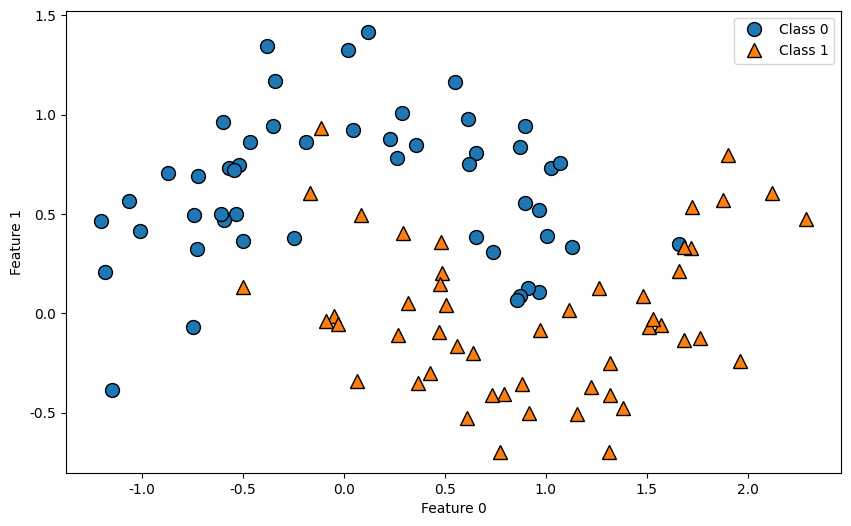

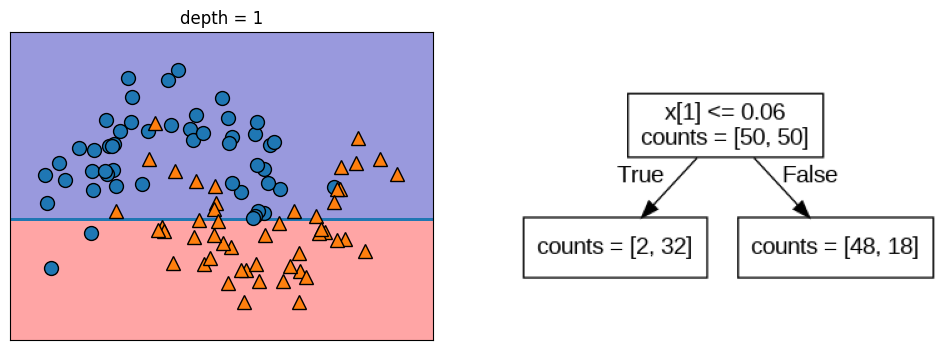

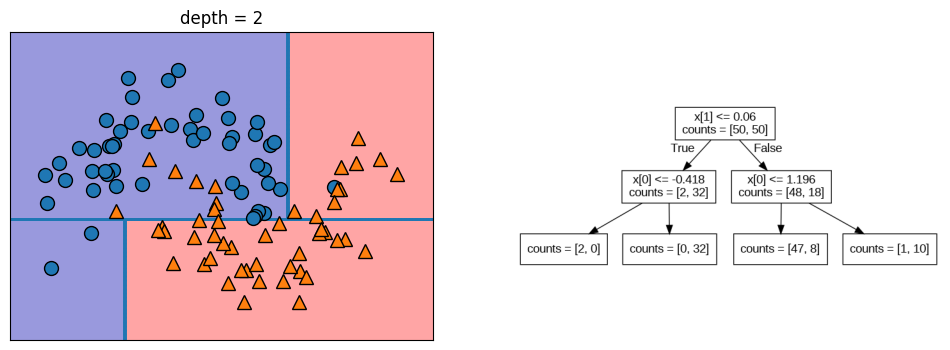

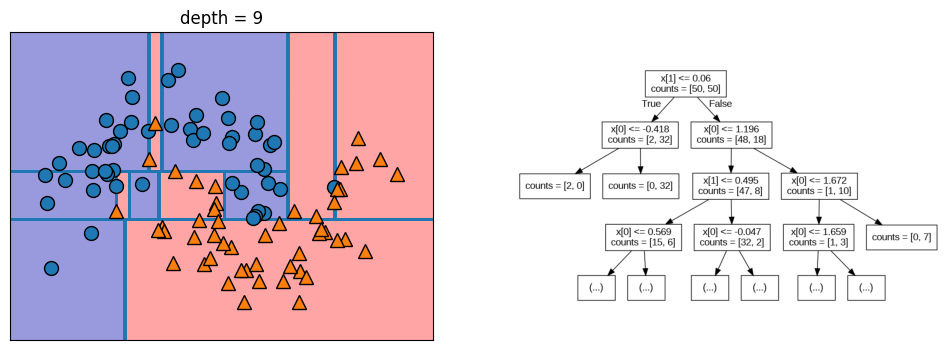

In [7]:
# 데이터 셋 - two_moons
mglearn.plots.plot_tree_progressive()

### 1.2 결정 트리 복잡도 제어 - Overfitting 방지

#### 1.2.1 max_depth 조절

In [8]:
# 데이터 로딩 및 데이터 분할
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                     random_state=123)

In [9]:
# 결정 트리 적용
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.923


In [10]:
# max_depth 조절
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.923


#### 1.2.2 min_samples_leaf 조절

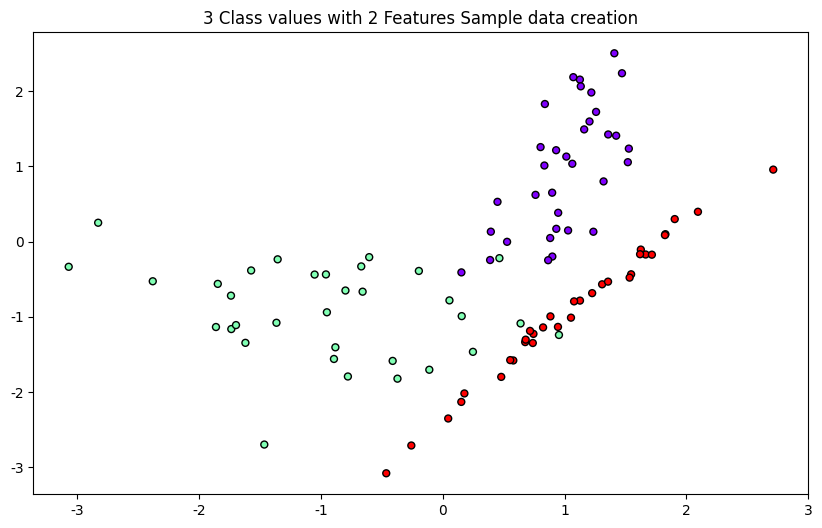

In [11]:
# 데이터 생성
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=123)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o',
            c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

In [19]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                        np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes+1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

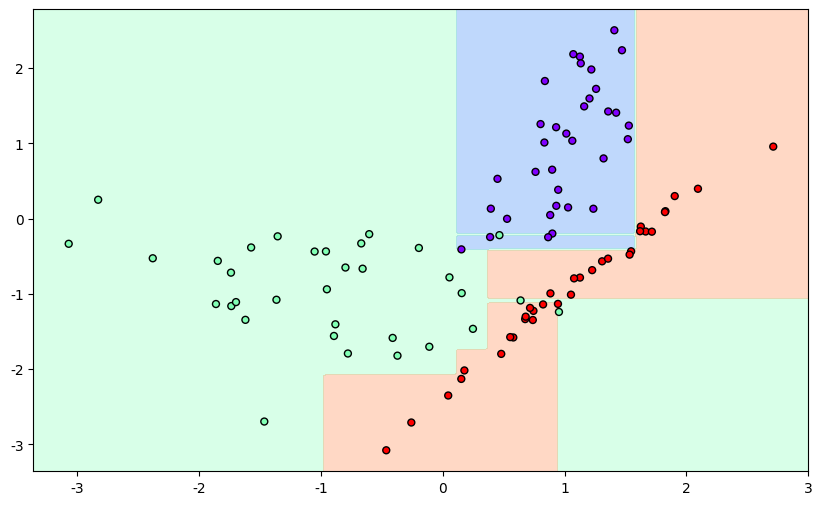

In [20]:
# 결정 트리 적용
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
df_clf = DecisionTreeClassifier(random_state=123).fit(X_features, y_labels)
visualize_boundary(df_clf, X_features, y_labels)

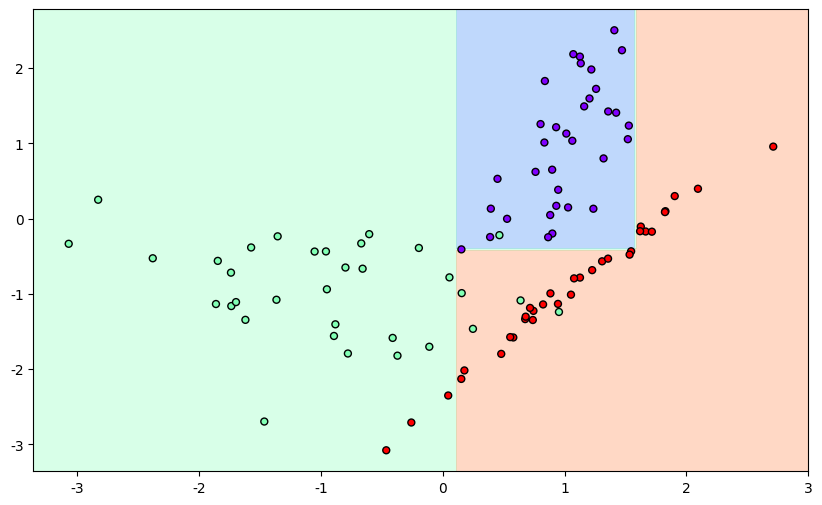

In [21]:
# min_samples_leaf=6 으로 조절
df_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=123).fit(X_features, y_labels)
visualize_boundary(df_clf, X_features, y_labels)

### 1.3 결정 트리 분석

#### 결정 트리 시각화

In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='/content/RaejungLecture-MachineLearning/Lecture/data/tree.dot',
                class_names=['악성', '양성'],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

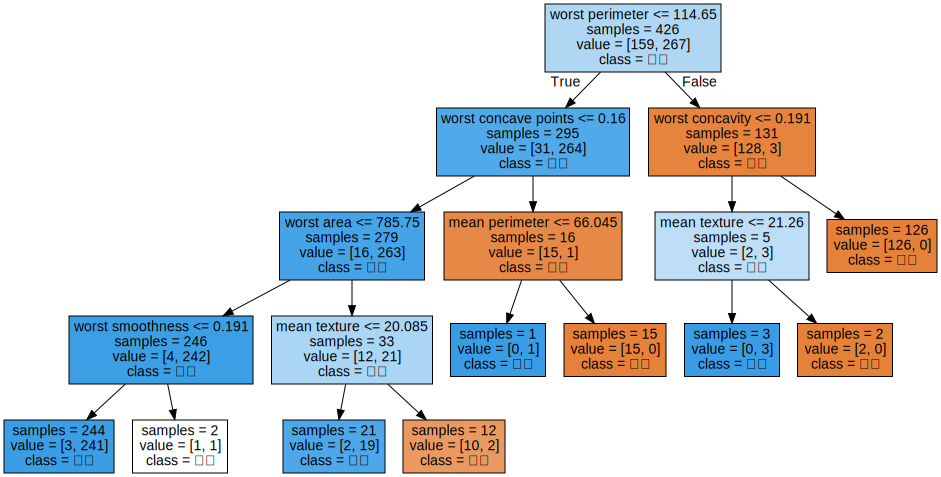

In [24]:
import graphviz

with open('/content/RaejungLecture-MachineLearning/Lecture/data/tree.dot', encoding='utf8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

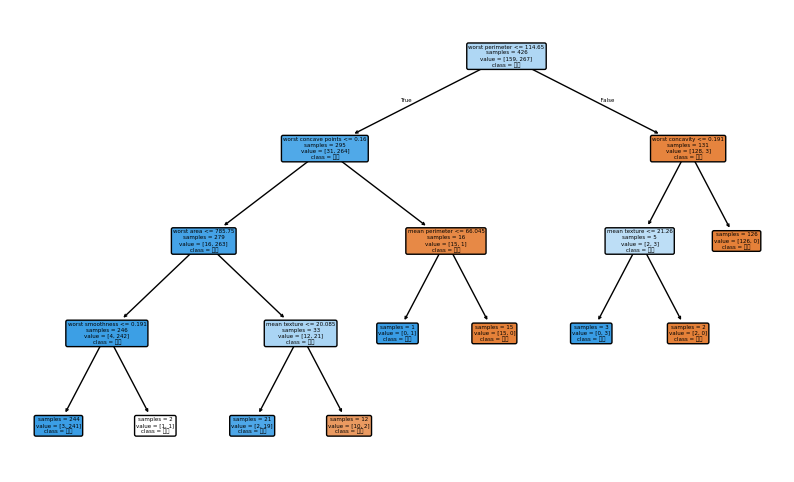

In [25]:
from sklearn.tree import plot_tree

plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer.feature_names,
          impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

### 1.4 결정 트리의 특성 중요도

#### Feature Importance

In [26]:
print('Feature Importance', tree.feature_importances_)

Feature Importance [0.         0.05781305 0.01011156 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.744009   0.03786972
 0.00508916 0.         0.0186732  0.12643431 0.         0.        ]


In [30]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

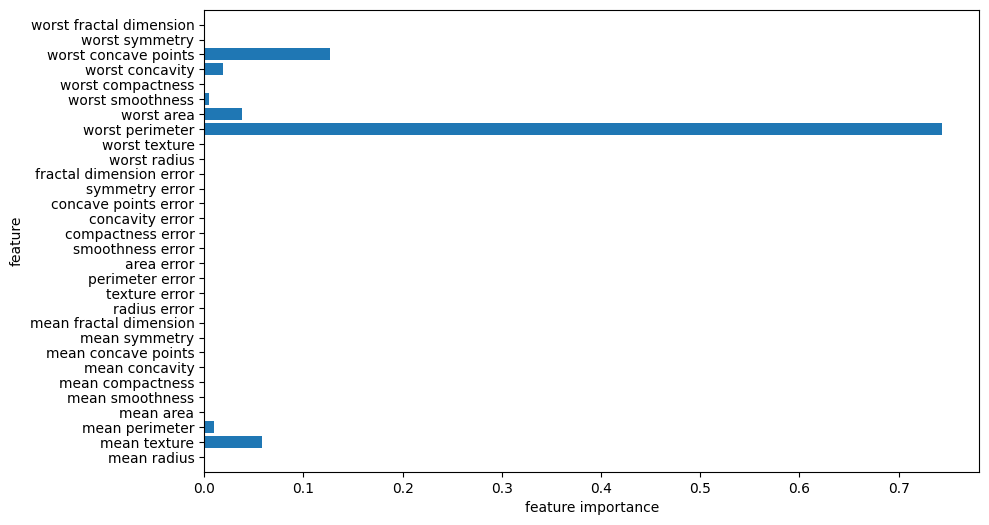

In [31]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


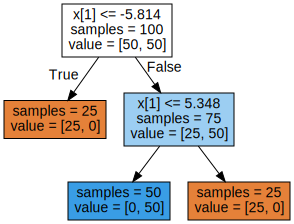

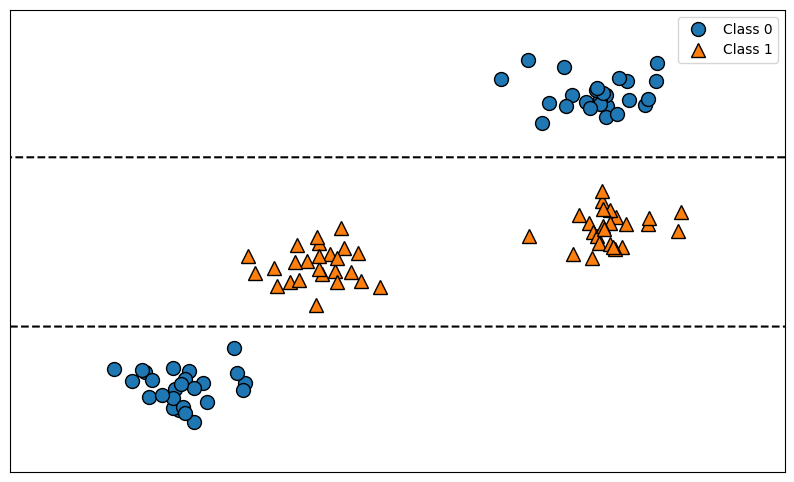

In [32]:
tree = mglearn.plots.plot_tree_not_monotone()
tree

### 1.5 결정 트리 & 선형 회귀 비교

#### (램 가격 동향(수치 예측), (결정 트리: 훈련 데이터 범위 밖의 데이터 예측 불가)

In [35]:
# 데이터 로딩
ram_prices = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/ram_price.csv',
                         index_col=0)
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [37]:
print(ram_prices.shape)
ram_prices.info()

(333, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    333 non-null    float64
 1   price   333 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB
